In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [ ]:
from google.colab import files
file=files.upload()

Saving Transactions.csv to Transactions (1).csv
Saving Customers.csv to Customers (1).csv


In [ ]:
customers_df=pd.read_csv('Customers.csv')
transactions_df = pd.read_csv('Transactions.csv')

In [ ]:
#check the m odel for correct data-types

#sign up date is in object data type --> convert into datetime
customers_df['SignupDate']=pd.to_datetime(customers_df['SignupDate'])

# number of days from the signup date --> to check how old the customer is
today=datetime.today()
customers_df['Days']=(today-customers_df['SignupDate']).dt.days

In [ ]:
#only transaction date i sin objectf format ---> convert into datetime
transactions_df['TransactionDate']=pd.to_datetime(transactions_df['TransactionDate'])
transactions_df['Day'] = transactions_df['TransactionDate'].dt.day_of_week
transactions_df['month'] = transactions_df['TransactionDate'].dt.month
transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
transactions_df['Time'] = transactions_df['TransactionDate'].dt.time

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
customers_df['Region']=le.fit_transform(customers_df['Region'])

In [ ]:
# Calculate customer metrics
customer_metrics = transactions_df.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'TransactionID': 'count',
    'month': 'nunique',
    'Quantity': 'sum',
    'ProductID': 'count'
}).reset_index()
customer_metrics.columns = ['CustomerID', 'TotalSpend', 'TransactionCount', 'Month','Quantity','product']

In [ ]:
# Merge customer profile and transaction data
merged_df = pd.merge(customers_df, customer_metrics, on='CustomerID')


In [ ]:
merged_df

,CustomerID,CustomerName,Region,SignupDate,Days,TotalSpend,TransactionCount,Month,Quantity
0,C0001,Lawrence Carroll,3,2022-07-10,934,3354.52,5,5,12
1,C0002,Elizabeth Lutz,0,2022-02-13,1081,1862.74,4,4,10
2,C0003,Michael Rivera,3,2024-03-07,328,2725.38,4,3,14
3,C0004,Kathleen Rodriguez,3,2022-10-09,843,5354.88,8,7,23
4,C0005,Laura Weber,0,2022-08-15,898,2034.24,3,3,7
...,...,...,...,...,...,...,...,...,...
194,C0196,Laura Watts,1,2022-06-07,967,4982.88,4,2,12
195,C0197,Christina Harvey,1,2023-03-21,680,1928.65,3,3,9
196,C0198,Rebecca Ray,1,2022-02-27,1067,931.83,2,2,3
197,C0199,Andrea Jenkins,1,2022-12-03,788,1979.28,4,2,9


In [ ]:
# Prepare features for clustering
features = ['Days', 'TotalSpend',"Month",'Quantity','product']
X = merged_df[features]
X

,Days,TotalSpend,Month,Quantity,product
0,934,3354.52,5,12,5
1,1081,1862.74,4,10,4
2,328,2725.38,3,14,4
3,843,5354.88,7,23,8
4,898,2034.24,3,7,3
...,...,...,...,...,...
194,967,4982.88,2,12,4
195,680,1928.65,3,9,3
196,1067,931.83,2,3,2
197,788,1979.28,2,9,4


In [ ]:
# Merge customer profile and transaction data
merged_df = pd.merge(customers_df, customer_metrics, on='CustomerID')
merged_df

,CustomerID,CustomerName,Region,SignupDate,Days,TotalSpend,TransactionCount,Month,Quantity,product
0,C0001,Lawrence Carroll,3,2022-07-10,934,3354.52,5,5,12,5
1,C0002,Elizabeth Lutz,0,2022-02-13,1081,1862.74,4,4,10,4
2,C0003,Michael Rivera,3,2024-03-07,328,2725.38,4,3,14,4
3,C0004,Kathleen Rodriguez,3,2022-10-09,843,5354.88,8,7,23,8
4,C0005,Laura Weber,0,2022-08-15,898,2034.24,3,3,7,3
...,...,...,...,...,...,...,...,...,...,...
194,C0196,Laura Watts,1,2022-06-07,967,4982.88,4,2,12,4
195,C0197,Christina Harvey,1,2023-03-21,680,1928.65,3,3,9,3
196,C0198,Rebecca Ray,1,2022-02-27,1067,931.83,2,2,3,2
197,C0199,Andrea Jenkins,1,2022-12-03,788,1979.28,4,2,9,4


In [ ]:
# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[0.84220355, 0.30894178, 0.57142857, 0.35483871, 0.4       ],
       [0.97945845, 0.16809501, 0.42857143, 0.29032258, 0.3       ],
       [0.27637722, 0.24954138, 0.28571429, 0.41935484, 0.3       ],
       [0.75723623, 0.49780626, 0.85714286, 0.70967742, 0.7       ],
       [0.8085901 , 0.18428723, 0.28571429, 0.19354839, 0.2       ],
       [0.33239963, 0.39137101, 0.28571429, 0.35483871, 0.3       ],
       [0.8627451 , 0.2357983 , 0.28571429, 0.22580645, 0.2       ],
       [0.32679739, 0.39552906, 0.85714286, 0.61290323, 0.9       ],
       [0.46872082, 0.07686723, 0.14285714, 0.06451613, 0.2       ],
       [0.69467787, 0.15438686, 0.42857143, 0.35483871, 0.3       ],
       [0.69747899, 0.34439282, 0.57142857, 0.38709677, 0.4       ],
       [0.13352007, 0.48613465, 0.57142857, 0.58064516, 0.6       ],
       [0.20821662, 0.5587683 , 0.71428571, 0.5483871 , 0.6       ],
       [0.17647059, 0.02231032, 0.        , 0.03225806, 0.        ],
       [0.37721755, 0.10150772, 0.

In [ ]:

# Determine optimal number of clusters using elbow method
cluster_distances = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    cluster_distances.append(kmeans.inertia_)

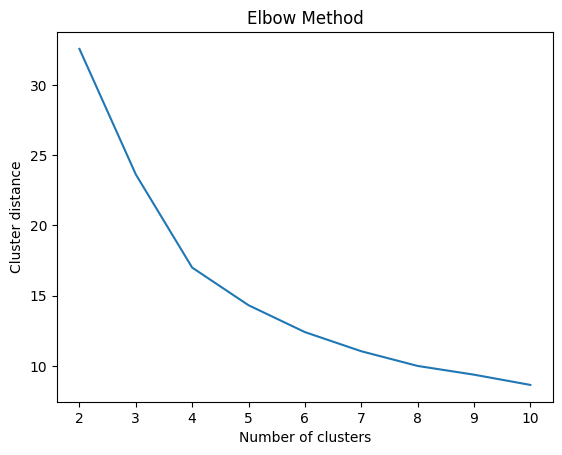

In [ ]:
# Plot elbow curve
plt.plot(range(2, 11), cluster_distances)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Cluster distance')
plt.show()


In [ ]:
# Choose optimal number of clusters
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(X_scaled)


In [ ]:
# Add cluster labels to the dataframe
merged_df['Cluster'] = cluster_labels

# Calculate clustering metrics
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
db_index = davies_bouldin_score(X_scaled, cluster_labels)

In [ ]:
print(f"Number of clusters: {n_clusters}")
print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {db_index:.4f}")

Number of clusters: 4
Silhouette Score: 0.3422
Davies-Bouldin Index: 0.9594


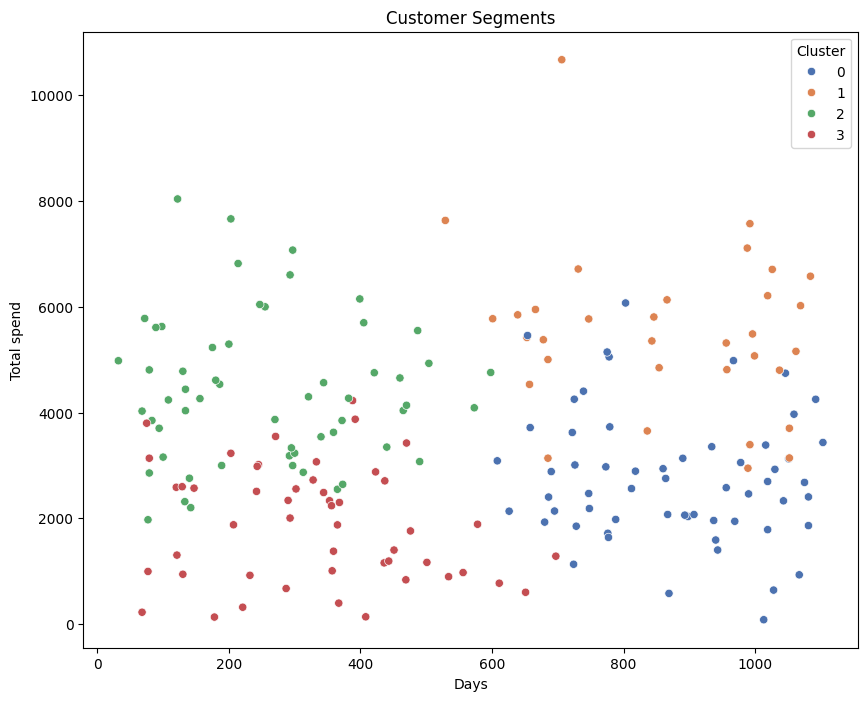

In [ ]:
# Visualize clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='Days', y='TotalSpend', hue='Cluster', palette='deep')
plt.title('Customer Segments')
plt.xlabel('Days')
plt.ylabel('Total spend')
plt.show()

In [ ]:
# Cluster characteristics
cluster_means = merged_df.groupby('Cluster')[features].mean()
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
               Days   TotalSpend     Month   Quantity   product
Cluster                                                        
0        873.220339  2757.348814  3.355932  10.135593  3.966102
1        863.393939  5505.421515  5.878788  20.181818  7.787879
2        260.421053  4392.320877  5.140351  16.140351  6.350877
3        332.220000  1905.415600  2.560000   7.060000  2.940000


Based on the provided cluster characteristics, we can summarize the cluster formation as follows:

1. Cluster 0: Long-term, Low-value Customers
   - Oldest customers (average 873 days since signup)
   - Lowest total spend (₹2,757 on average)
   - Least frequent purchasers (3.4 months between purchases)
   - Smallest basket size (10 items) and product variety (4 products)

2. Cluster 1: High-value Loyal Customers
   - Second oldest customers (863 days since signup)
   - Highest total spend (₹5,505 on average)
   - Most frequent purchasers (5.9 months between purchases)
   - Largest basket size (20 items) and widest product variety (8 products)

3. Cluster 2: New High-value Customers
   - Relatively new customers (260 days since signup)
   - Second-highest total spend (₹4,392 on average)
   - Second most frequent purchasers (5.1 months between purchases)
   - Second-largest basket size (16 items) and product variety (6 products)

4. Cluster 3: New Low-value Customers
   - Second newest customers (332 days since signup)
   - Lowest total spend (₹1,905 on average)
   - Least frequent purchasers (2.6 months between purchases)
   - Smallest basket size (7 items) and least product variety (3 products)

This clustering reveals distinct customer segments based on tenure, spending habits, purchase frequency, and product engagement. It provides valuable insights for targeted marketing strategies and customer relationship management.